In [20]:
# Dependencies
import pandas as pd
import numpy as np
import scipy.stats as sts
import scipy.stats as stats
from scipy.stats import linregress
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
from matplotlib.cm import inferno
from matplotlib.colors import to_hex
import json
import gmaps

#import api key
from config import gkey

#import data
# Store filepath in a variable
census_data = "chicago_census_data.csv"
vaccine_data = "COVID-19_Vaccinations_by_ZIP_Code.csv"
area_data = "chicago_areas.csv"
census_df = pd.read_csv(census_data, encoding="ISO-8859-1")
vaccine_df = pd.read_csv(vaccine_data,encoding="ISO-8859-1")
area_df = pd.read_csv(area_data,encoding="ISO-8859-1")

In [21]:
#cleaning census so Zip Code column matches Vaccine CSV Zip Code
census_df = census_df.rename(columns={"Zipcode":"Zip Code"})
census_df.dtypes

Zip Code               int64
Population             int64
Median Age           float64
Household Income       int64
Per Capita Income      int64
Poverty Count          int64
Poverty Rate         float64
dtype: object

In [22]:
#getting rid of 'Unknown' values in vaccine df
vaccine_df = vaccine_df[vaccine_df["Zip Code"] != "Unknown"]

In [23]:
#changing Zip Code from Object to int
vaccine_df["Zip Code"]=vaccine_df["Zip Code"].astype(int)

In [24]:
#merging vaccine data and census data
merge_df = pd.merge(vaccine_df, census_df, on="Zip Code")

#display df
merge_df.head()

,Zip Code,Date,Total Doses - Daily,Total Doses - Cumulative,1st Dose - Daily,1st Dose - Cumulative,1st Dose - Percent Population,Vaccine Series Completed - Daily,Vaccine Series Completed - Cumulative,Vaccine Series Completed - Percent Population,Population_x,ZIP Code Location,Row_ID,Population_y,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,60603,12/15/2020,0,0,0,0,0.000,0,0,0.0,1052,POINT (-87.625473 41.880112),60603-20201215,1052,31.2,146250,134620,142,13.498099
1,60603,12/16/2020,0,0,0,0,0.000,0,0,0.0,1052,POINT (-87.625473 41.880112),60603-20201216,1052,31.2,146250,134620,142,13.498099
2,60603,12/17/2020,8,8,8,8,0.008,0,0,0.0,1052,POINT (-87.625473 41.880112),60603-20201217,1052,31.2,146250,134620,142,13.498099
3,60603,12/18/2020,6,14,6,14,0.013,0,0,0.0,1052,POINT (-87.625473 41.880112),60603-20201218,1052,31.2,146250,134620,142,13.498099
4,60603,12/19/2020,3,17,3,17,0.016,0,0,0.0,1052,POINT (-87.625473 41.880112),60603-20201219,1052,31.2,146250,134620,142,13.498099


In [25]:
#are population_x and population_y the same? If yes, test_df will be empty
test_df = merge_df.loc[merge_df["Population_x"] != merge_df["Population_y"]]

#display df
test_df

,Zip Code,Date,Total Doses - Daily,Total Doses - Cumulative,1st Dose - Daily,1st Dose - Cumulative,1st Dose - Percent Population,Vaccine Series Completed - Daily,Vaccine Series Completed - Cumulative,Vaccine Series Completed - Percent Population,Population_x,ZIP Code Location,Row_ID,Population_y,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate


In [26]:
#drop unnecessary columns
final_df = merge_df.drop(columns=['Row_ID', 'Poverty Count', 'Poverty Rate', 'Household Income', 'Population_x', 'Vaccine Series Completed - Daily','Vaccine Series Completed - Cumulative','Vaccine Series Completed  - Percent Population'])

#rename column names
final_df.rename(columns = {'Zip Code':"zip_code",'Date':"date",'Total Doses - Daily':"total_doses_daily",
                           'Total Doses - Cumulative':"total_doses_cumulative",'1st Dose - Daily':"1st_dose_daily",
                           '1st Dose - Cumulative':"1st_dose_cumulative",'1st Dose - Percent Population':"1st_dose_percent_population",
                           'ZIP Code Location':"zip_code_location",'Population_y':"population",'Median Age':"median_age",
                           'Per Capita Income':"per_capita_income"}, 
            inplace = True)

final_df.head()

,zip_code,date,total_doses_daily,total_doses_cumulative,1st_dose_daily,1st_dose_cumulative,1st_dose_percent_population,zip_code_location,population,median_age,per_capita_income
0,60603,12/15/2020,0,0,0,0,0.000,POINT (-87.625473 41.880112),1052,31.2,134620
1,60603,12/16/2020,0,0,0,0,0.000,POINT (-87.625473 41.880112),1052,31.2,134620
2,60603,12/17/2020,8,8,8,8,0.008,POINT (-87.625473 41.880112),1052,31.2,134620
3,60603,12/18/2020,6,14,6,14,0.013,POINT (-87.625473 41.880112),1052,31.2,134620
4,60603,12/19/2020,3,17,3,17,0.016,POINT (-87.625473 41.880112),1052,31.2,134620


In [27]:
#display final_df data types
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5858 entries, 0 to 5857
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   zip_code                     5858 non-null   int32  
 1   date                         5858 non-null   object 
 2   total_doses_daily            5858 non-null   int64  
 3   total_doses_cumulative       5858 non-null   int64  
 4   1st_dose_daily               5858 non-null   int64  
 5   1st_dose_cumulative          5858 non-null   int64  
 6   1st_dose_percent_population  5858 non-null   float64
 7   zip_code_location            5858 non-null   object 
 8   population                   5858 non-null   int64  
 9   median_age                   5858 non-null   float64
 10  per_capita_income            5858 non-null   int64  
dtypes: float64(2), int32(1), int64(6), object(2)
memory usage: 526.3+ KB


In [28]:
#make a copy of the final_df for bar graph
final_date_df = final_df

#Date is a String object, need to convert it to a Datetime object for date comparison 
final_date_df['date'] = pd.to_datetime(final_date_df['date'], format='%m/%d/%Y')
final_date_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5858 entries, 0 to 5857
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   zip_code                     5858 non-null   int32         
 1   date                         5858 non-null   datetime64[ns]
 2   total_doses_daily            5858 non-null   int64         
 3   total_doses_cumulative       5858 non-null   int64         
 4   1st_dose_daily               5858 non-null   int64         
 5   1st_dose_cumulative          5858 non-null   int64         
 6   1st_dose_percent_population  5858 non-null   float64       
 7   zip_code_location            5858 non-null   object        
 8   population                   5858 non-null   int64         
 9   median_age                   5858 non-null   float64       
 10  per_capita_income            5858 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(1),

In [29]:
#Create a data series with zip code and max date
zip_date_ser = final_date_df.groupby('zip_code')['date'].max()
zip_date_ser.reset_index()

## Create a dataframe for merging with the original dataframe
zip_date_df = pd.DataFrame(zip_date_ser)

## Merge on Zip Code and max date via left join
final_max_date_df = pd.merge(zip_date_df, final_date_df, on=("date"), how="left")
final_max_date_df.head(3)

,date,zip_code,total_doses_daily,total_doses_cumulative,1st_dose_daily,1st_dose_cumulative,1st_dose_percent_population,zip_code_location,population,median_age,per_capita_income
0,2021-03-25,60603,8,995,8,623,0.592,POINT (-87.625473 41.880112),1052,31.2,134620
1,2021-03-25,60604,4,690,3,432,0.525,POINT (-87.629029 41.878153),823,32.2,101652
2,2021-03-25,60608,903,36794,802,27423,0.343,POINT (-87.670366 41.849879),80059,32.6,23525


In [30]:
#Add a column of % complete on last day for each zip code
final_max_date_df['1st_dose_percent_complete'] = round(final_max_date_df['1st_dose_cumulative'] * 100 /final_max_date_df['population'], 2)

#calcuate the mean % complete of Chicago: 
percent_1st_dose_complete_Chicago = round(final_max_date_df['1st_dose_cumulative'].sum() * 100 / final_max_date_df['population'].sum(), 2)
print(f"percent_1st_dose_complete_Chicago = {percent_1st_dose_complete_Chicago}")

percent_1st_dose_complete_Chicago = 24.51


In [32]:
#drop duplicate values from final_max_date_df
df = final_max_date_df.drop_duplicates()

#set index to zip code
df = df.set_index('zip_code')

avg = df['1st_dose_percent_complete'].mean()

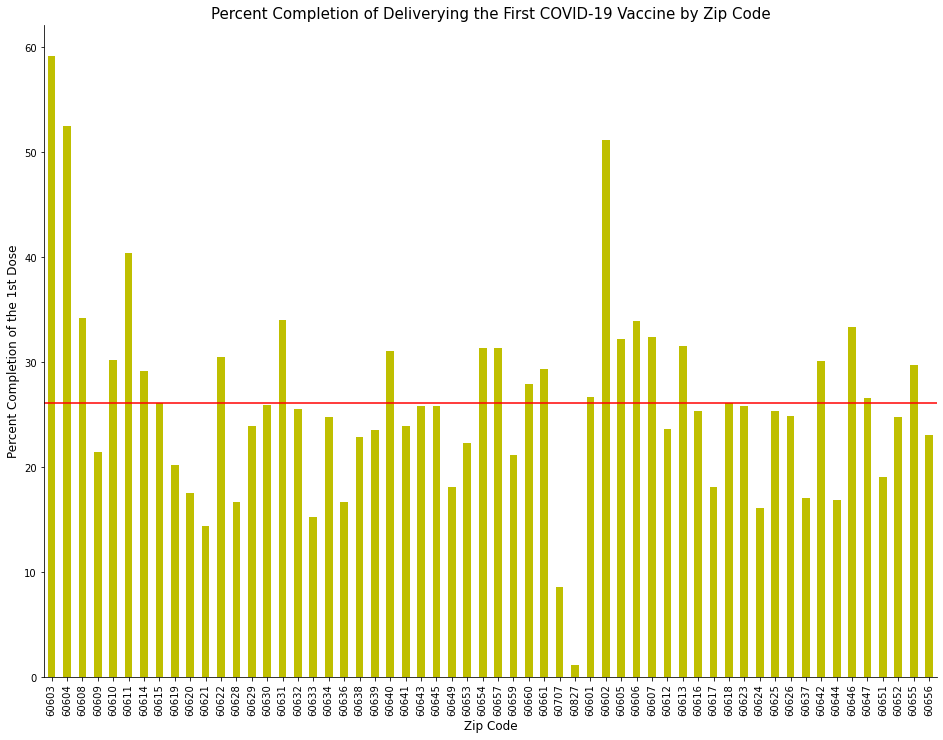

In [33]:
#plot bar graph of % completion by zip code
import seaborn as sns
df['1st_dose_percent_complete'].plot.bar(figsize=(16,12), color = 'y')
sns.despine()
plt.title('Percent Completion of Deliverying the First COVID-19 Vaccine by Zip Code',fontsize =15)
plt.xlabel('Zip Code',fontsize =12)
plt.ylabel('Percent Completion of the 1st Dose',fontsize =12)
plt.axhline(y = avg, color = 'r', linestyle = '-');

In [46]:
#find the max dose to group by Chicago area
max_dose = final_df.loc[final_df.groupby(["zip_code"])["1st_dose_cumulative"].idxmax()]

#display df
max_dose.head()

,zip_code,date,total_doses_daily,total_doses_cumulative,1st_dose_daily,1st_dose_cumulative,1st_dose_percent_population,zip_code_location,population,median_age,per_capita_income
3555,60601,2021-03-25,77,6280,55,4024,0.267,POINT (-87.622844 41.886262),15083,33.6,101066
3638,60602,2021-03-25,11,944,7,586,0.512,POINT (-87.628309 41.883136),1145,34.1,128502
99,60603,2021-03-25,8,995,8,623,0.592,POINT (-87.625473 41.880112),1052,31.2,134620
200,60604,2021-03-25,4,690,3,432,0.525,POINT (-87.629029 41.878153),823,32.2,101652
3790,60605,2021-03-25,179,14852,138,9349,0.322,POINT (-87.623449 41.867824),29060,33.6,81496


In [48]:
#change the 1st_dose_percent_population to value greater than 1
max_dose['1st_dose_percent_complete'] = max_dose['1st_dose_percent_population'] * 100

#display df
max_dose.head()

,zip_code,date,total_doses_daily,total_doses_cumulative,1st_dose_daily,1st_dose_cumulative,1st_dose_percent_population,zip_code_location,population,median_age,per_capita_income,1st_dose_percent_complete
3555,60601,2021-03-25,77,6280,55,4024,0.267,POINT (-87.622844 41.886262),15083,33.6,101066,26.7
3638,60602,2021-03-25,11,944,7,586,0.512,POINT (-87.628309 41.883136),1145,34.1,128502,51.2
99,60603,2021-03-25,8,995,8,623,0.592,POINT (-87.625473 41.880112),1052,31.2,134620,59.2
200,60604,2021-03-25,4,690,3,432,0.525,POINT (-87.629029 41.878153),823,32.2,101652,52.5
3790,60605,2021-03-25,179,14852,138,9349,0.322,POINT (-87.623449 41.867824),29060,33.6,81496,32.2


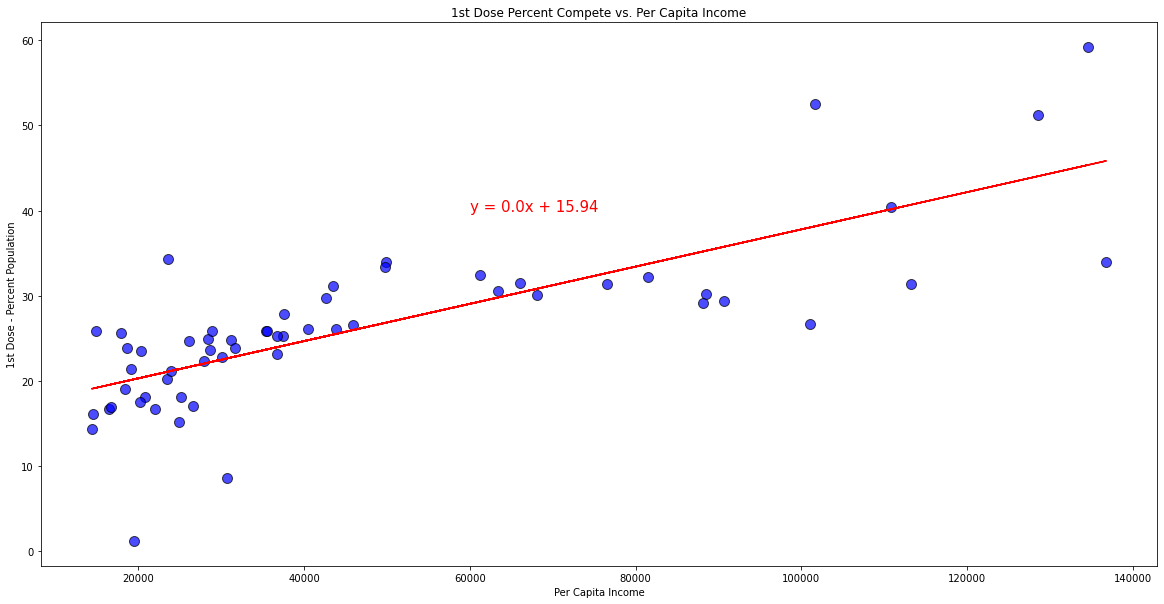

The r-value is: 0.7675260542636421


<Figure size 432x288 with 0 Axes>

In [50]:
#plot a scatter plot of 1st dose complete vs. per capita income
x_values = max_dose["per_capita_income"]
y_values = max_dose["1st_dose_percent_complete"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure (figsize=(20,10))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",
            s=100, alpha=0.7)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60000,40),fontsize=15,color="red")
plt.title("1st Dose Percent Compete vs. Per Capita Income")
plt.xlabel('Per Capita Income')
plt.ylabel('1st Dose - Percent Population')
plt.show();
plt.savefig(r'income_1stdose.png')
print(f"The r-value is: {rvalue}");

In [56]:
#rename columns for merge
area_df.rename(columns = {'Chicago Community Areas':"chicago_community_areas", 'Zip Code':"zip_code", 
                          'Chicago Areas':"chicago_areas", 'Area Grouped':"area_grouped"}, 
            inplace = True)

#create df for Chicago areas
area_df =  pd.merge(max_dose, area_df, on="zip_code")

#display df
area_df.head()

,zip_code,date,total_doses_daily,total_doses_cumulative,1st_dose_daily,1st_dose_cumulative,1st_dose_percent_population,zip_code_location,population,median_age,per_capita_income,1st_dose_percent_complete,chicago_community_areas,chicago_areas,area_grouped
0,60601,2021-03-25,77,6280,55,4024,0.267,POINT (-87.622844 41.886262),15083,33.6,101066,26.7,32,West Side,West Side
1,60602,2021-03-25,11,944,7,586,0.512,POINT (-87.628309 41.883136),1145,34.1,128502,51.2,32,Central,Central
2,60603,2021-03-25,8,995,8,623,0.592,POINT (-87.625473 41.880112),1052,31.2,134620,59.2,32,Central,Central
3,60604,2021-03-25,4,690,3,432,0.525,POINT (-87.629029 41.878153),823,32.2,101652,52.5,32,Central,Central
4,60605,2021-03-25,179,14852,138,9349,0.322,POINT (-87.623449 41.867824),29060,33.6,81496,32.2,32,Central,Central


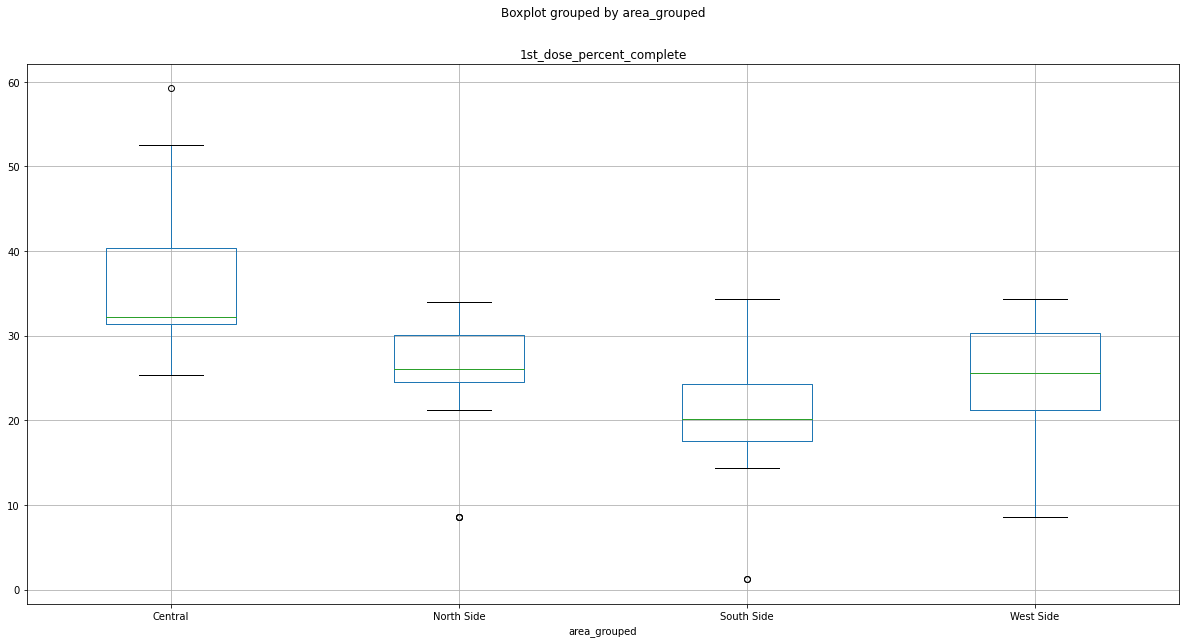

In [63]:
#plot boxplot of 5 of population with 1 covid vaccine by chicago "area"
area_df.boxplot("1st_dose_percent_complete", by="area_grouped", figsize=(20, 10))
plt.savefig('boxplot_groupedAreas.png');

In [68]:
# Extract individual groups by area
group1 = area_df[area_df["chicago_areas"] == "Central"]["1st_dose_percent_complete"]
group2 = area_df[area_df["chicago_areas"] == "North Side"]["1st_dose_percent_complete"]
group3 = area_df[area_df["chicago_areas"] == "South Side"]["1st_dose_percent_complete"]
group4 = area_df[area_df["chicago_areas"] == "West Side"]["1st_dose_percent_complete"]

# Perform the ANOVA for p-value of first vaccine 
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=23.833747220401833, pvalue=1.2204770252894455e-11)

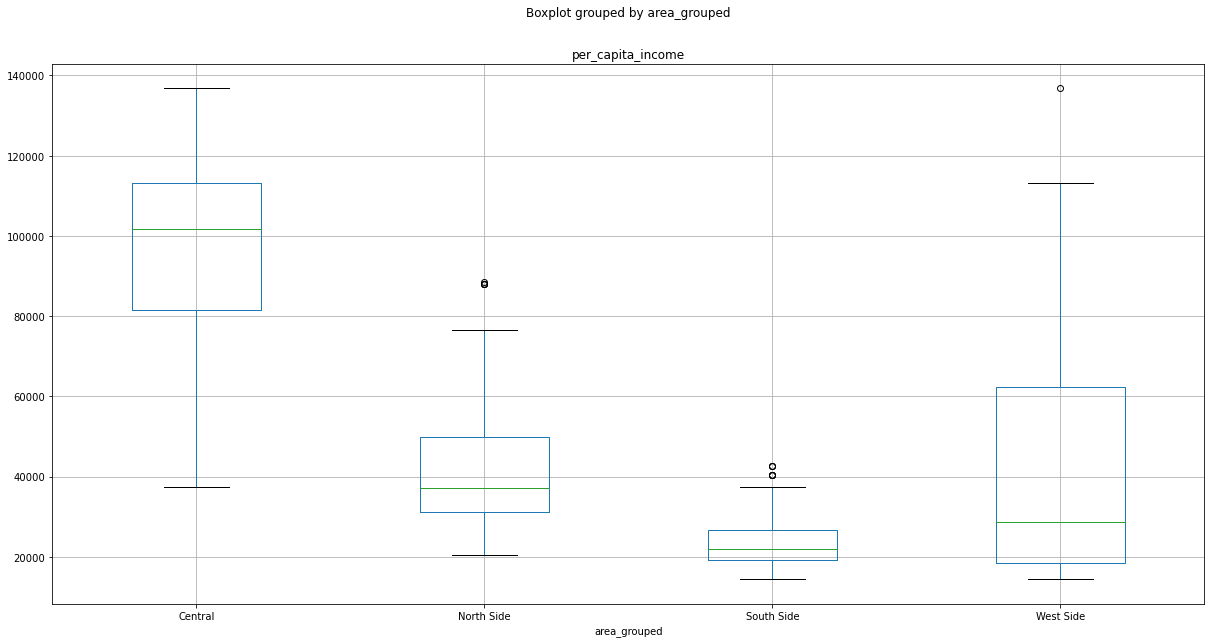

In [69]:
#plot box plot of per capita income by chicago "areas"
area_df.boxplot("per_capita_income", by="area_grouped", figsize=(20, 10))
plt.savefig('boxplot_poverty_groupedAreas.png');

In [71]:
# Extract individual groups
group1 = area_df[area_df["chicago_areas"] == "Central"]["per_capita_income"]
group2 = area_df[area_df["chicago_areas"] == "North Side"]["per_capita_income"]
group3 = area_df[area_df["chicago_areas"] == "South Side"]["per_capita_income"]
group4 = area_df[area_df["chicago_areas"] == "West Side"]["per_capita_income"]

# Perform the ANOVA for p-value of per capita income and vaccine %
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=23.4311418406542, pvalue=1.7219312775804263e-11)

In [42]:
#create choropleth map of % of vaccine completion and per capita income

# Calculate the final vaccine count of each zip code
#get a df with the selected columns
vaccine_heatmap_df = final_df[['zip_code','date','1st_dose_daily','1st_dose_cumulative','1st_dose_percent_population',
                               'population','zip_code_location', "per_capita_income"]]

# Start by getting the last (greatest) timepoint for each zip code
groupby_df = pd.DataFrame({"vaccine_max":vaccine_heatmap_df.groupby("zip_code")["1st_dose_cumulative"].max()})

# Merge this group df with the original dataframe to get the # of vaccines at the last timepoint
merged_df = pd.merge(vaccine_heatmap_df, groupby_df, how='outer', on='zip_code')
greatest_vaccine_df = merged_df.loc[(merged_df["1st_dose_cumulative"]==merged_df["vaccine_max"])]
greatest_vaccine_df = greatest_vaccine_df[['zip_code','date','1st_dose_cumulative','population','1st_dose_percent_population',
                                           'zip_code_location',"per_capita_income"]]

#get lat/lng coordinates in a format that gmaps can use (float)
lng_lat_list = greatest_vaccine_df["zip_code_location"].tolist()
cleaned = []
for coord in lng_lat_list:
    x = coord.strip("POINT (").strip(")").replace(" ",",")
    cleaned.append(x)
lat = []
lng = []
for coord in cleaned:
    a,b = coord.split(',')
    lat.append(float(a))
    lng.append(float(b))
cleaned_df = pd.DataFrame({"Lat":lat,
                        "Lng":lng,
                       "zip_code_location":lng_lat_list})

#add cleaned lat/lng to greatest_vaccine_df
gmaps_merged_df = pd.merge(greatest_vaccine_df, cleaned_df, how='outer', on='zip_code_location')

#show df
gmaps_merged_df.head()

,zip_code,date,1st_dose_cumulative,population,1st_dose_percent_population,zip_code_location,per_capita_income,Lat,Lng
0,60603,2021-03-25,623,1052,0.592,POINT (-87.625473 41.880112),134620,-87.625473,41.880112
1,60604,2021-03-25,432,823,0.525,POINT (-87.629029 41.878153),101652,-87.629029,41.878153
2,60608,2021-03-25,27423,80059,0.343,POINT (-87.670366 41.849879),23525,-87.670366,41.849879
3,60609,2021-03-25,13052,60939,0.214,POINT (-87.653382 41.812017),19096,-87.653382,41.812017
4,60610,2021-03-25,12251,40548,0.302,POINT (-87.63581 41.90455),88537,-87.635810,41.904550


In [43]:
#import the zip code boundaries using the geojson from https://data.cityofchicago.org/
with open('chicago_boundaries.geojson') as f:
    geometry = json.load(f)

In [44]:
#create a choropleth map for Chicago Per Capita Income
#load vaccine completion percentage data
zipcodes = gmaps_merged_df["zip_code"].to_list()
vaccine_percent = gmaps_merged_df["1st_dose_percent_population"].round(4).to_list()
rows = list(zip(zipcodes,vaccine_percent))
zipcode2vaccine = dict(rows)

#map colors to vaccine completion percentage
def calculate_color(vaccine_percentage):
    inverse_vaccine = 1.0 - vaccine_percentage
    matpltlib_color = viridis(inverse_vaccine)
    gmaps_color = to_hex(matpltlib_color,keep_alpha=False)
    return gmaps_color

colors = []
for feature in geometry['features']:
    zipcode = feature['properties']['zip']
    zipcode = int(zipcode)
    try:
        vaccine_percentage = zipcode2vaccine[zipcode]
        color = calculate_color(vaccine_percentage)
    except KeyError:
        # no zipcode: return default color
        color = (0, 0, 0, 0.3)
    colors.append(color)

fig = gmaps.figure()
vaccine_layer = gmaps.geojson_layer(
    geometry,
    fill_color=colors,
    stroke_color=colors,
    fill_opacity=0.8)
fig.add_layer(vaccine_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [45]:
#create a choropleth map for Chicago Per Capita Income
#load income data
income = (gmaps_merged_df["per_capita_income"]).to_list()
rows = list(zip(zipcodes,income))
zipcode2income = dict(rows)

#scale income values to lie between 0 and 1
min_income = min(zipcode2income.values())
max_income = max(zipcode2income.values())
income_range = max_income - min_income

#map colors to per capita income
def calculate_color2(income_map):
    # make income a number between 0 and 1
    normalized_income = (income_map - min_income) / income_range

    # invert income so that high inequality gives dark color
    inverse_income = 1.0 - normalized_income

    # transform the income coefficient to a matplotlib color
    matplotlib_color = inferno(inverse_income)

    # transform from a matplotlib color to a valid CSS color
    gmaps_color = to_hex(matplotlib_color, keep_alpha=False)

    return gmaps_color

colors2 = []
for feature in geometry['features']:
    zipcode = feature['properties']['zip']
    zipcode = int(zipcode)
    try:
        income_map = zipcode2income[zipcode]
        color = calculate_color2(income_map)
    except KeyError:
        # no Per Capita income for that zipcode: return default color
        color = (0, 0, 0, 0.3)
    colors2.append(color)

#show new figure
fig2 = gmaps.figure()
income_layer = gmaps.geojson_layer(
    geometry,
    fill_color=colors2,
    stroke_color=colors2,
    fill_opacity=0.8)
fig2.add_layer(income_layer)
fig2

Figure(layout=FigureLayout(height='420px'))